In [15]:
import json
import matplotlib.pyplot as plt
from statistics import mean, variance
import numpy as np

from kp.utils.constants import EXPERIMENTS_DIR

In [27]:
RESULTS_DIR = EXPERIMENTS_DIR / "fake_movies_real_actors"
FIGURES_DIR = RESULTS_DIR / "figures"
FIGURES_DIR.mkdir(exist_ok=True)
results_paths = RESULTS_DIR.rglob("*.json")

In [28]:
results_paths

<generator object Path.rglob at 0x7f4e682b2ea0>

In [29]:
results = []
for results_path in results_paths:
    with open(results_path, "r") as f:
        data = json.load(f)

    dropout_rate = data["config"]["experiment_config"]["patch_dropout"]

    target_probs = [
        ex["target"]["token_prob"]
        for ex in data["results"]
        if "target" in ex and "token_prob" in ex["target"]
    ]

    # TODO: Set this up with some sort of top k setup
    accuracy = [
        int(ex["target"]["token_idx"] == ex["top_predictions"][0]["token_id"])
        for ex in data["results"]
    ]

    avg_prob = mean(target_probs)
    avg_accuracy = mean(accuracy)
    var_prob = variance(target_probs)

    results.append({
        "dropout_rate": dropout_rate,
        "avg_prob": avg_prob,
        "var_prob": var_prob,
        "avg_accuracy": avg_accuracy,
    })


In [30]:
results

[{'dropout_rate': 0.4,
  'avg_prob': 0.4136498496933176,
  'var_prob': 0.1808839853963743,
  'avg_accuracy': 0.517},
 {'dropout_rate': 0.2,
  'avg_prob': 0.6400903847649059,
  'var_prob': 0.16604443835719962,
  'avg_accuracy': 0.726},
 {'dropout_rate': 0.6,
  'avg_prob': 0.11776958922484083,
  'var_prob': 0.07524100010777633,
  'avg_accuracy': 0.177},
 {'dropout_rate': 0.7,
  'avg_prob': 0.04937957680245134,
  'var_prob': 0.030546413800696868,
  'avg_accuracy': 0.086},
 {'dropout_rate': 0.1,
  'avg_prob': 0.7150074410080751,
  'var_prob': 0.14692438247623155,
  'avg_accuracy': 0.781},
 {'dropout_rate': 0.8,
  'avg_prob': 0.01194497258341383,
  'var_prob': 0.006597797851728953,
  'avg_accuracy': 0.021},
 {'dropout_rate': 0.9,
  'avg_prob': 0.002852293526156693,
  'var_prob': 0.0008344111002062602,
  'avg_accuracy': 0.003},
 {'dropout_rate': 0.3,
  'avg_prob': 0.5364898297117434,
  'var_prob': 0.18560301943979274,
  'avg_accuracy': 0.625},
 {'dropout_rate': 0.5,
  'avg_prob': 0.256410779

In [31]:
dropout_rates = [r["dropout_rate"] for r in results]
avg_probs = [r["avg_prob"] for r in results]
std_devs = [np.sqrt(r["var_prob"]) for r in results]  # std = sqrt(variance)
avg_accuracies = [r["avg_accuracy"] for r in results]

sorted_data = sorted(zip(dropout_rates, avg_probs, std_devs, avg_accuracies))
x, y, yerr, z = zip(*sorted_data)

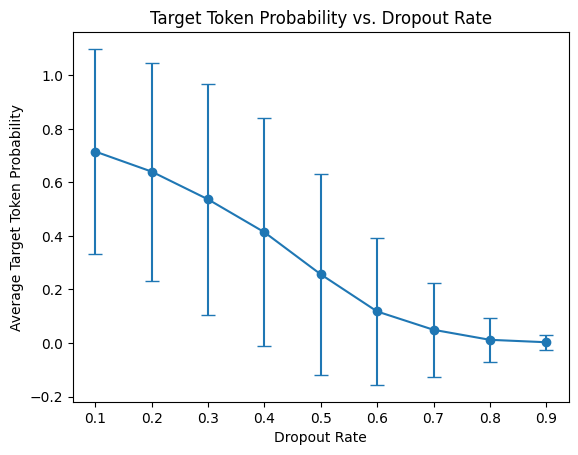

In [32]:
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)
plt.xlabel("Dropout Rate")
plt.ylabel("Average Target Token Probability")
plt.title("Target Token Probability vs. Dropout Rate")
plt.savefig(FIGURES_DIR / "dropout_vs_prob.png", dpi=300, bbox_inches="tight")
plt.show()

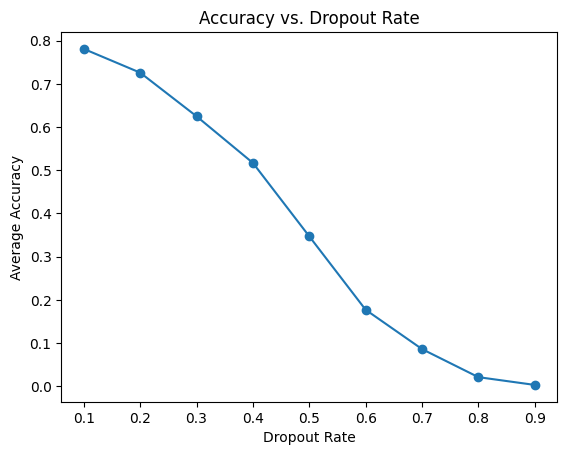

In [33]:
plt.errorbar(x, z, fmt='o-', capsize=5)
plt.xlabel("Dropout Rate")
plt.ylabel("Average Accuracy")
plt.title("Accuracy vs. Dropout Rate")
plt.savefig(FIGURES_DIR / "dropout_vs_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()